# NLP - Fine-grained Sentiment Analysis

In [1]:
!pip install datasets -qqq
!pip install transformers -qqq

     |████████████████████████████████| 325 kB 6.8 MB/s 
     |████████████████████████████████| 77 kB 7.4 MB/s 
     |████████████████████████████████| 136 kB 63.8 MB/s 
     |████████████████████████████████| 1.1 MB 49.8 MB/s 
     |████████████████████████████████| 212 kB 11.9 MB/s 
     |████████████████████████████████| 127 kB 50.1 MB/s 
     |████████████████████████████████| 94 kB 565 kB/s 
     |████████████████████████████████| 271 kB 62.8 MB/s 
     |████████████████████████████████| 144 kB 58.6 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
     |████████████████████████████████| 4.0 MB 9.1 MB/s 
     |████████████████████████████████| 6.6 MB 48.9 MB/s 
     |████████████████████████████████| 596 kB 13.6 MB/s 
     |████████████████████████████████| 880

In [2]:
!pip install -U sentence-transformers -qqq

     |████████████████████████████████| 79 kB 5.5 MB/s 
     |████████████████████████████████| 1.2 MB 22.6 MB/s 


In [3]:
import torch
from datasets import load_dataset
from transformers import AutoTokenizer
from sentence_transformers import SentenceTransformer
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans




dataset = load_dataset('imdb', split='train')


model = SentenceTransformer('sentence-transformers/bert-base-nli-mean-tokens')

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

Dataset imdb downloaded and prepared to /root/.cache/huggingface/datasets/imdb/plain_text/1.0.0/2fdd8b9bcadd6e7055e742a706876ba43f19faee861df134affd7a3f60fc38a1. Subsequent calls will reuse this data.


Downloading:   0%|          | 0.00/391 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.95k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/625 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/399 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [4]:
shuffled_dataset = dataset.shuffle(seed=123)

texts = shuffled_dataset['text'][:2000]
labels = shuffled_dataset['label'][:2000]

sentence_embeddings = model.encode(texts)


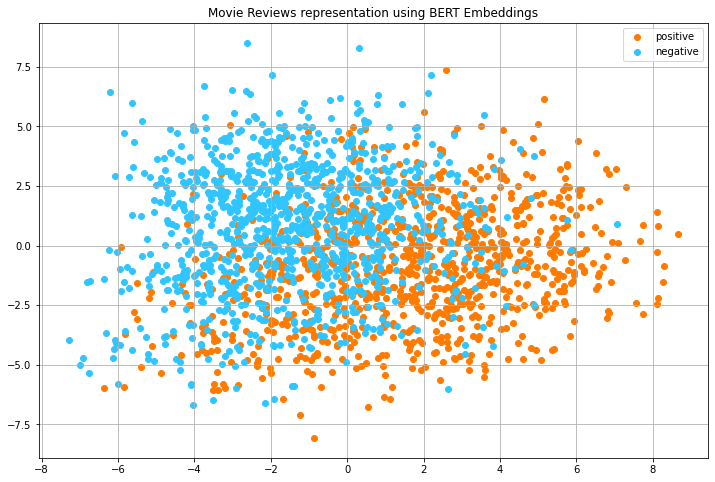

In [5]:
pca = PCA(n_components=2,
                   random_state=123)
reduced_features = pca.fit_transform(sentence_embeddings)

positive = np.array([_feat for _label, _feat in zip(labels, reduced_features) if _label == 1])
negative = np.array([_feat for _label, _feat in zip(labels, reduced_features) if _label == 0])


plt.scatter(positive[:,0], positive[:,1], color='#FF7B00', label="positive")
plt.scatter(negative[:,0], negative[:,1], color='#31C5FF', label='negative')
plt.legend()
fig = plt.gcf()
figsize = fig.get_size_inches()
fig.set_size_inches(figsize * 2)
plt.title("Movie Reviews representation using BERT Embeddings")
plt.grid()

/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


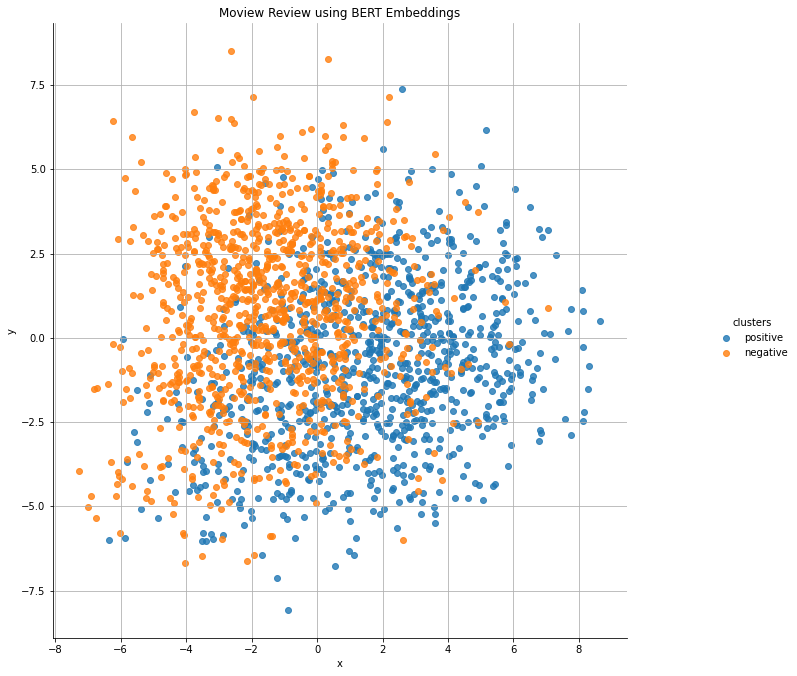

In [6]:
def pca_reduction(features, labels_values, n_components, random_state=20, 
                  label_decoder=None, title='PCA Plot', magnify=2):
  # move to GPU matrix
  pca = PCA(n_components=n_components,
                   random_state=random_state)
  reduced_features = pca.fit_transform(features)

  # plot
  if (n_components==2) and (labels_values is not None):
    # create data frame
    reduced_features_df = pd.DataFrame()
    reduced_features_df['x'] = reduced_features[:,0]
    reduced_features_df['y'] = reduced_features[:,1]
    if label_decoder is not None:
      reduced_features_df['clusters'] = [label_decoder[int(value)] for value in labels_values]
    else:
      reduced_features_df['clusters'] = [int(value) for value in labels_values]
    #plot data with seaborn
    cluster_plot = sns.lmplot(data=reduced_features_df, x='x', y='y', hue='clusters', fit_reg=False, legend=True, legend_out=True)
    plt.title(title)
    fig = plt.gcf()
    figsize = fig.get_size_inches()
    fig.set_size_inches(figsize * magnify)
    plt.grid()
    plt.show()

reduced_features = pca_reduction(features=sentence_embeddings, 
                                 labels_values=labels, 
                                 n_components=2, 
                                 label_decoder={0:"negative", 1:"positive"},
                                 title='Moview Review using BERT Embeddings')


In [7]:
pca = PCA(n_components=2,
                   random_state=20)
reduced_features = pca.fit_transform(sentence_embeddings)

[[label, i] for i, (val, label) in enumerate(zip(reduced_features, labels)) if val[0] < -2 and val[1] > 4 ]

[[0, 15],
 [0, 77],
 [0, 121],
 [0, 199],
 [0, 231],
 [0, 296],
 [0, 339],
 [0, 363],
 [0, 447],
 [0, 483],
 [0, 486],
 [0, 487],
 [0, 508],
 [0, 536],
 [0, 627],
 [0, 662],
 [0, 674],
 [0, 734],
 [0, 747],
 [0, 757],
 [0, 761],
 [0, 906],
 [0, 907],
 [0, 961],
 [0, 964],
 [0, 1037],
 [0, 1083],
 [0, 1226],
 [0, 1286],
 [0, 1300],
 [0, 1309],
 [0, 1329],
 [0, 1338],
 [0, 1392],
 [0, 1458],
 [0, 1506],
 [0, 1571],
 [0, 1602],
 [0, 1618],
 [0, 1854],
 [0, 1855],
 [1, 1870],
 [0, 1881],
 [0, 1903],
 [0, 1932],
 [0, 1997]]

In [8]:
texts[1870]

"I could not agree less with the rating that was given to this movie, and I believe this is a sample of how short minded most of spectators are all over the world. Really... Are you forgetting that Cinema used to be a kind of art before some tycoons tried to make it only entertainment? This movie is not entertainment, at least not that easy entertainment you get on movies like Titanic or Gladiator. It has style, it is different, it is shocking... That's why most of you have hated it so much: because it does not try to be pleasing to you. It's just a story, a very weird one I admit, but after all, only a weird story. It is not a great story, not even a great cinema work, but I believe it is worth a 7-stars rating only for the courage of both author and director to shot a story that is not made to please the audience, thus selling billions of copies and making the big studios even richer. This movie is, for me, European-artistic-like movie made in the US, and everyone involved in the mak

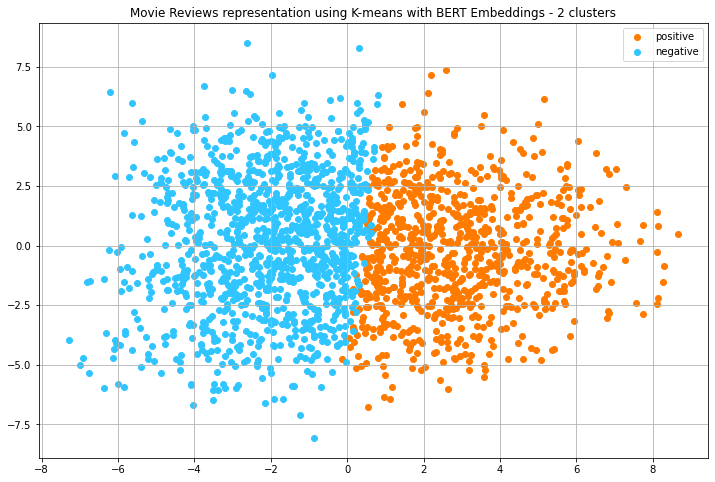

In [9]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(sentence_embeddings)

pca = PCA(n_components=2,
                   random_state=123)
reduced_features = pca.fit_transform(sentence_embeddings)

positive = np.array([_feat for _label, _feat in zip(kmeans.labels_, reduced_features) if _label == 1])
negative = np.array([_feat for _label, _feat in zip(kmeans.labels_, reduced_features) if _label == 0])


plt.scatter(positive[:,0], positive[:,1], color='#FF7B00', label="positive")
plt.scatter(negative[:,0], negative[:,1], color='#31C5FF', label='negative')
plt.legend()
fig = plt.gcf()
figsize = fig.get_size_inches()
fig.set_size_inches(figsize * 2)
plt.title("Movie Reviews representation using K-means with BERT Embeddings - 2 clusters")
plt.grid()

In [10]:
pca = PCA(n_components=2,
                   random_state=20)
reduced_features = pca.fit_transform(sentence_embeddings)

[[label, i] for i, (val, label) in enumerate(zip(reduced_features, labels)) if val[0] < -6 and val[1] < -5 ]

[[0, 186], [1, 672], [0, 871], [0, 1014]]

In [11]:
texts[871]

'**SPOILERS** Redicules slasher film that makes no sense at all with a killer running around dressed in a black robe and wearing what looks like a pull-over Peter Lorre rubber mask. Were told early in the movie, almost the very first scene, that young Beth Morgan was in rehab due to heavy drug use after her boyfriend was murdered in Tennyson Collage about a year ago.<br /><br />It\'s also brought out that FBI Agent Sacker\'s (Jeff Conaway), who\'s obsessed in catching the killer,daughter was also murdered in Tennyson around the same time. By the time the movie "Do You Wanna Know A Secret" is over it\'s never explained just what those two killings back in Connecticute has to do with the slaughter in Florida of some half dozen collage students a year later? other that the killer, at least in the murder of Beth\'s boyfriend, wore the same silly Halloween outfit. <br /><br />At spring break in the Sunshine State the six students spend their vacation at a beach house and before you know it 

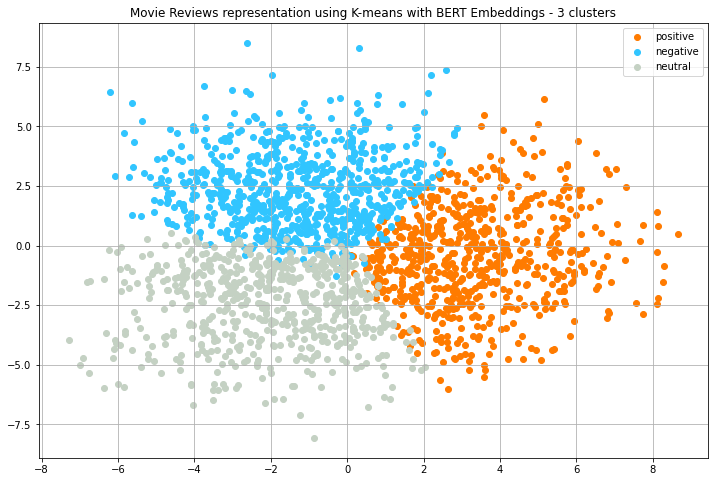

In [12]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(sentence_embeddings)

pca = PCA(n_components=2,
                   random_state=123)
reduced_features = pca.fit_transform(sentence_embeddings)

positive = np.array([_feat for _label, _feat in zip(kmeans.labels_, reduced_features) if _label == 0])
negative = np.array([_feat for _label, _feat in zip(kmeans.labels_, reduced_features) if _label == 1])
neutral = np.array([_feat for _label, _feat in zip(kmeans.labels_, reduced_features) if _label == 2])


plt.scatter(positive[:,0], positive[:,1], color='#FF7B00', label="positive")
plt.scatter(negative[:,0], negative[:,1], color='#31C5FF', label='negative')
plt.scatter(neutral[:,0], neutral[:,1], color='#C4D1C3', label='neutral')
plt.legend()
fig = plt.gcf()
figsize = fig.get_size_inches()
fig.set_size_inches(figsize * 2)
plt.title("Movie Reviews representation using K-means with BERT Embeddings - 3 clusters")
plt.grid()

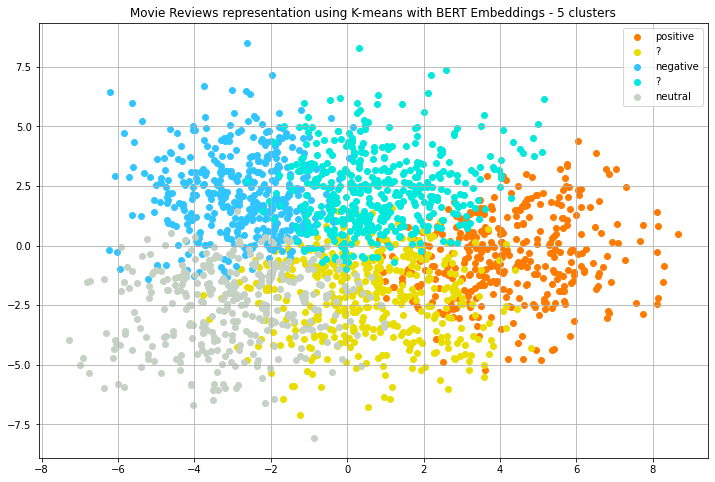

In [13]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(sentence_embeddings)

pca = PCA(n_components=2,
                   random_state=123)
reduced_features = pca.fit_transform(sentence_embeddings)

positive = np.array([_feat for _label, _feat in zip(kmeans.labels_, reduced_features) if _label == 4])
weakly_positive = np.array([_feat for _label, _feat in zip(kmeans.labels_, reduced_features) if _label == 2])
neutral = np.array([_feat for _label, _feat in zip(kmeans.labels_, reduced_features) if _label == 3])
weakly_negative = np.array([_feat for _label, _feat in zip(kmeans.labels_, reduced_features) if _label == 1])
negative = np.array([_feat for _label, _feat in zip(kmeans.labels_, reduced_features) if _label == 0])


plt.scatter(positive[:,0], positive[:,1], color='#FF7B00', label="positive")
plt.scatter(weakly_positive[:,0], weakly_positive[:,1], color='#E9DD00', label="?")
plt.scatter(negative[:,0], negative[:,1], color='#31C5FF', label='negative')
plt.scatter(weakly_negative[:,0], weakly_negative[:,1], color='#00E9DC', label='?')
plt.scatter(neutral[:,0], neutral[:,1], color='#C4D1C3', label='neutral')
plt.legend()
fig = plt.gcf()
figsize = fig.get_size_inches()
fig.set_size_inches(figsize * 2)
plt.title("Movie Reviews representation using K-means with BERT Embeddings - 5 clusters")
plt.grid()